# Blobber for Python Beginners

To utilise Blobber, the best interface would be running Python on Jupyter Notebook. However, if one does not have previous experiences with Jupyter Notebook or Python, here is a step by step guide to install Jupyter Notebook.

## 1) Installing Anaconda on your computer

Since there is already an official step by step guide on installing Anaconda. I will not re-iterate the installation steps. One can find the official installation guide for [Windows here](https://docs.anaconda.com/anaconda/install/windows/); And for macOS, the installation guide is [here](https://docs.anaconda.com/anaconda/install/mac-os/).

## 2) Opening Jupyter Notebook on your computer

After installing Anaconda, open the Anaconda navigator, you should see something like this, where Jupyter note book is already in the navigator.

![Anaconda Navigator](images/Anaconda%20Navigator.png "Anaconda Navigator")

Now, simply click on the launch button, an instance of Jupyter Notebook should automatically open in your default browswer. You should see your file directory display as it is shown in the picture below.

![Jupyter Directory](images/Jupyter%201.png "Jupyter Directory")

You can now freely navigate to different directories via this file directory interface.

## 3) Opening a Terminal in Jupyter Notebook

It is important that you use the **terminal in Jupyter Notebook**, to do that, click on the `New` tab then click on the `Terminal` tab, as shown in the figure below.

![New Jupyter Terminal](images/Jupyter%202.png "New Jupyter Terminal")

## 4) Installing Blobber in your default Anaconda Python environment

Assuming now you are in your terminal that you opened a moment ago in Jupyter Notebook. You need to firstly activate your default Anaconda Python environment. This can be done via typing the following command in the terminal:

    conda activate

Then, you can install Blobber one one simple command:

    python -m pip install blobber

Now, assuming you have followed the above steps correctly, you should have now have Blobber installed and ready to go!

Following is a screenshot of my terminal after I have ran the above steps.

![Terminal Screenshot](images/Terminal%201.png "Terminal Screenshot")

## 5) Creating a Jupyter Notebook file

Now, you can create a new Jupyter Notebook file in any directories of your preferences by clicking the `New` tab and seltect the `Python 3 (ipykernel)` tab as shwon in the image below.

![New Jupyter Notebook](images/Jupyter%203.png "New Jupyter Notebook")

It should automatically redirect you to the newly created file, and to rename it, you need to click on the default name on the top left corner as shown in the following image.

![Change Jupyter Notebook File Name](images/Jupyter%204.png "Change File name")

If you have gotten to here, you are now officially ready to use Blobber!


# Blobber Example Usage

In [1]:
# Firstly, we need to import Blobber
import blobber

## Opening an Image

To open images, we can just call the `blobber.openImage()` method, where it will open an image file as a 2D-array. Note that this method **does not** show the image, it merely opens them as an array for later usage.

In [2]:
framing = blobber.openImage("example framing.tif")
ex_im_1 = blobber.openImage("example image 1.tif")
ex_im_2 = blobber.openImage("example image 2.tif")

## Displaying Blobs

### Superimposing Blobs detections on the framing picture

`blobber.showBlobsWithFrame()` method would be the most time efficient method on checking blobs positions manually. This method requires 2 compulsory inputs: the cathode spots image and the framing image as shown below.

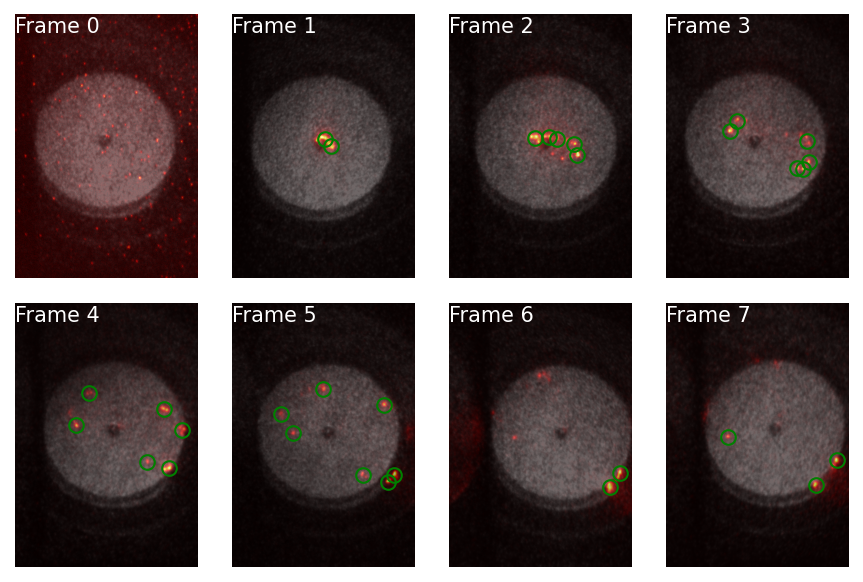

In [5]:
blobber.showBlobsWithFrame(ex_im_1, framing)

### Displaying blobs on with an automatically generated mask.

Blobber is capable of generating an elliptical mask that will discards any blobs detected outside of the mask, but this method falls short when we don't have the entirety of the cathode in all images. And it is very slow compare to the previous method. 

First, to utilise this method, we need to generate masks and accquire their parameters, which I will assign them to `masks_stacks` and `ellipse_params` variables seperatly. This can be achieve by calling the `blobber.generateMask()` method. It takes the framing image that we have opened earlier. This process might take a while.  

In [7]:
masks_stacks, ellipse_params = blobber.generateMask(framing)


          Extracting ellipse from image, this process might take 1 to 10 minutes
          depending on your computer's performence. Please be patient. The estimated
          time will show soon.
          


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   51.6s remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:   58.8s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:   59.6s remaining:   59.6s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:  1.0min remaining:   36.8s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  1.4min remaining:   27.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.4min finished


### Displaying blobs on with an automatically generated mask con.

Now, we have calculated the appropriate parameters, we can just call `blobber.showMaskedBlobs()` method. Where we will pass a raw image and the calculated parameters into this method. This should show us all the blobs that are inside the cathode surface.

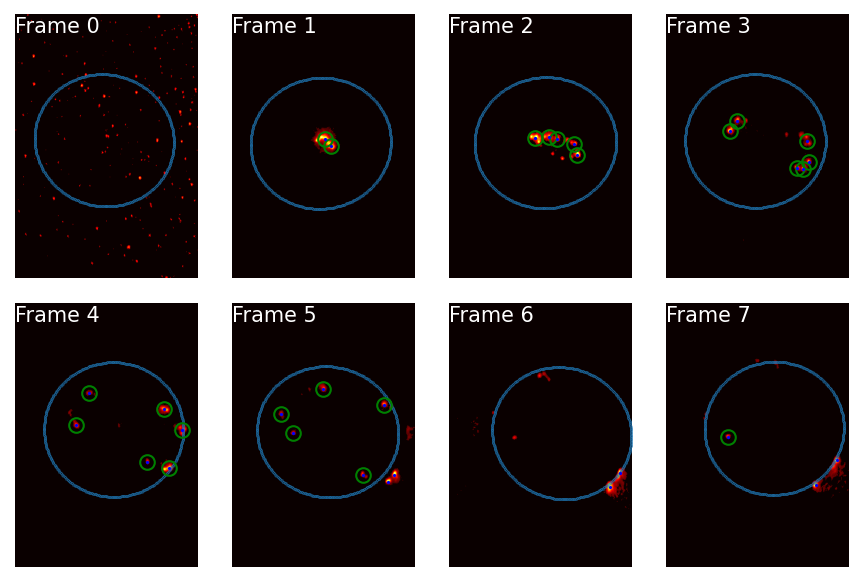

In [8]:
blobber.showMaskedBlobs(ex_im_1, masks_stacks, ellipse_params)

### Displaying Pixel Value Histogram

To display the pixel value histogram, one can simply call the `blobber.showPixelHistogram()` method. This method will return you a pixel value histogram with the **x-axis** being the pixel value and the **y-axis** being the log of the occurance (frequency).

Note that the Hamamatsu framing streak camera outputs a file of 12 bit pixel value. Thus the hitogram's x-axis range is set to be [0, 4095].

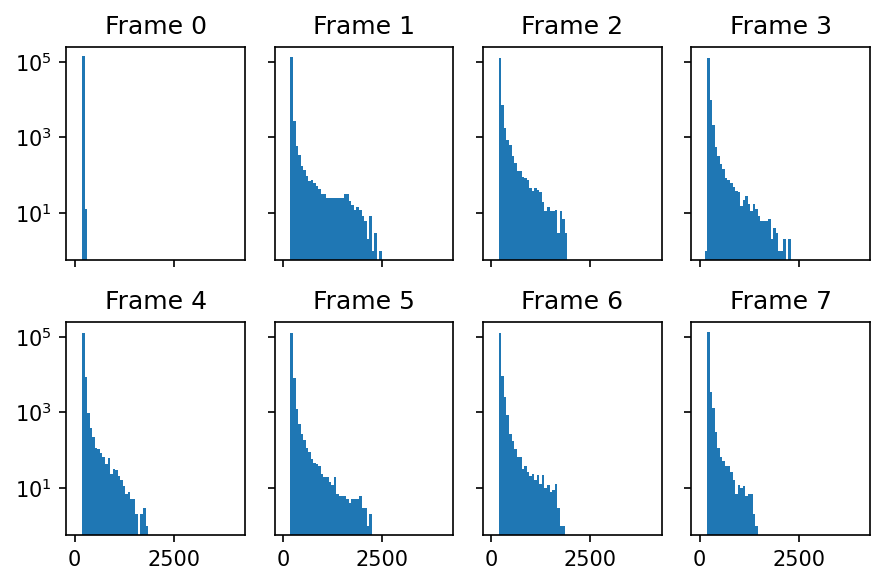

In [9]:
blobber.showPixelHistogram(ex_im_1)